In [1]:
%matplotlib inline

In [2]:
import sys
sys.path += ['../']
import matplotlib.pyplot as plt
from src.data.preprocess import run_pca
from src.data.make_dataset import load_dataset, load_subjects
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import hcp
import mne
import numpy as np

In [7]:
dataset = load_dataset('../data/processed/hcp-new', '../data/hcp-train.csv')
testdataset = load_dataset('../data/processed/hcp-new', '../data/hcp-eval.csv')

In [16]:
testdataset['data'][0][0][:3].shape

(3, 24)

In [17]:
def transform_data(data, channels):
    """Select a number of channels from each data record and concatenate them into a single vector"""
    
    return [np.ravel(d[0][:channels]) for d in data['data']]    

In [18]:
channels = 10

dd = transform_data(dataset, channels)
td = transform_data(testdataset, channels)

In [42]:
len(dd), len(dataset['data'])

(847, 847)

In [22]:
model = svm.SVC(gamma=0.01, C=10.)
model.fit(dd, dataset['age'])

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
def evaluate(model, key, data, ref):

    predicted = model.predict(data)
    print("{:.2f}% correct".format(100*accuracy_score(ref[key], predicted)))
    print(confusion_matrix(ref[key], predicted))

In [26]:
evaluate(model, 'age', dd, dataset)

100.00% correct
[[275   0   0]
 [  0 280   0]
 [  0   0 292]]


In [27]:
evaluate(model, 'age', td, testdataset)

42.72% correct
[[11 43  0]
 [27 41  9]
 [ 1 38 36]]


In [28]:
rfmodel = RandomForestClassifier(n_estimators=100)
rfmodel.fit(dd, dataset['age'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
evaluate(rfmodel, 'age', dd, dataset)

100.00% correct
[[275   0   0]
 [  0 280   0]
 [  0   0 292]]


In [30]:
evaluate(rfmodel, 'age', td, testdataset)

51.46% correct
[[30 24  0]
 [17 32 28]
 [ 1 30 44]]


In [47]:
model = svm.SVC(gamma=0.01, C=10.)
model.fit(dd, dataset['gender'])


SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
evaluate(model, 'gender', dd, dataset)

100.00% correct
[[318   0]
 [  0 529]]


In [50]:
evaluate(model, 'gender', td, testdataset)

83.98% correct
[[76  0]
 [33 97]]


In [37]:
def show(n):
    data = dd[n]
    data = data.reshape(channels,24)
    plt.pcolor(data)
    print(dataset['age'][n], dataset['gender'][n])


22-25 F


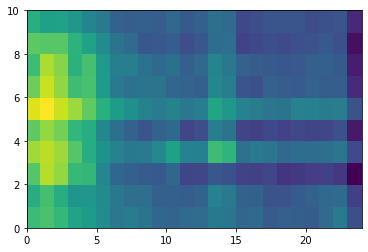

In [38]:
show(0)

26-30 M


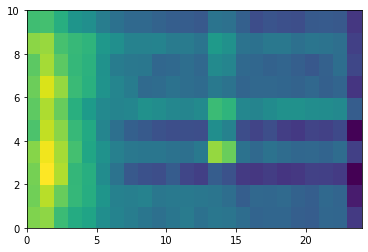

In [46]:
show(500)

31-35 F


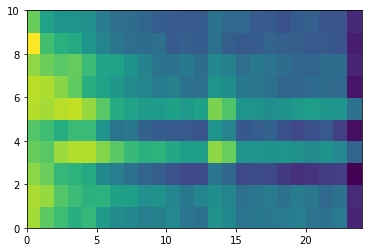

In [45]:
show(700)